In [1]:
using PyPlot

INFO: Precompiling module PyPlot...


# El conjunto de Julia #

La definición formal del conjunto de Julia, tal como la expresó Gaston Julia es la siguiente. Dado una función compleja racional $f(z)$ del plano complejo sobre si mismo, esto es $f(z) = p(z)/q(z)$ donde $p(z)$ y $q(z)$ son polinomios complejos, hay un número finito de conjuntos abiertos $F_i$ que son invariantes respecto a $f(z)$ y que cumplen:

1. La unión de $F_i$ es densa en el plano y

2. $f(z)$ se comporta de manera regular y equivalente para cada uno de los conjuntos $F_i$

El conjunto de $F_i$ son los dominios de Fatou de $f(z)$, su unión es el dominio de Fatou, y su complenentario es el conjunto de Julia $J(z)$

Esta definición no es muy útil en la práctica, que es entender la naturaleza fractal del conjunto de Julia. El equivalente mas práctico es que, dado un polinomio complejo $f(z)$, el conjunto de Julia $J(z)$ corresponde al contorno en el plano complejo de los puntos en cuya iteración del polinomio converge a infinito.

Es un buen ejemplo para comparar la eficiencia del código producido por distintos lenguajes de programación. Es un algoritmo sencillo, costoso, y es difícilmente predecible el coste computacional que tendrá dado un parámetro.

La función a iterar más habitual es un polinomio cuadrático

$$f_c(z) = z^2 +c$$, donde el parámetro $c$ sirve para generar distintos conjuntos $J(z)$

In [2]:
function julia_iteration(z, c, maxiter::UInt8)
    for n = 1:maxiter
        if abs(z) > 2
            return n
        end
        z = z^2 + c
    end
    return maxiter
end

julia_iteration (generic function with 1 method)

In [3]:
function julia_set(w::Int64, h::Int64, c, maxiter::UInt8)
    tStart=time()
    m = Array(UInt8, h, w)  
    for y=1:h, x=1:w
        z = complex((x-w/2)/(h/2), (y-h/2)/(h/2))
        m[y,x] = julia_iteration(z, c, maxiter)
    end
    tStop = time()-tStart
    println("Made a $w x $h image in  $tStop seconds");

    return m
end

julia_set (generic function with 1 method)

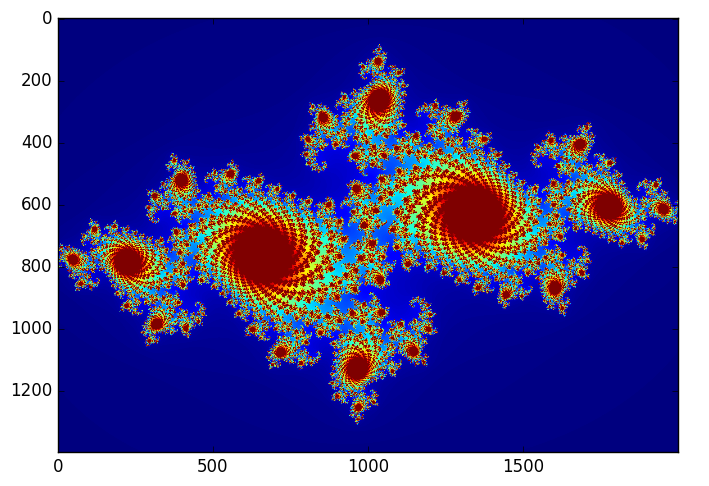

Made a 2000 x 1400 image in  2.2298290729522705 seconds


PyObject <matplotlib.image.AxesImage object at 0x7f5ed53c5cf8>

In [5]:
m = julia_set(2000,1400, complex(-0.7269, 0.1889), UInt8(255))
PyPlot.imshow(m)